<a href="https://colab.research.google.com/github/itsJonnie/Movie-Recommendation-System/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# INSTALL REQUIRED LIBRARIES:
# pip install pandas numpy scikit-learn

# Data Preprocessing

### Read data into notebook from ML-100K.zip (https://grouplens.org/datasets/movielens/100k/)

In [3]:
file_path = "/content/drive/My Drive/Colab Notebooks/Datasets//ml-100k.zip"

import os
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Check the path.")


File found!


In [9]:
import zipfile

file_path = "/content/drive/My Drive/Colab Notebooks/Datasets/ml-100k.zip"

with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall("/content")  # Extract to /content instead

import os
print("After extraction, /content contains:", os.listdir("/content"))



After extraction, /content contains: ['.config', 'drive', 'ml-100k', 'sample_data']


In [12]:
import pandas as pd
ratings_path = "/content/ml-100k/u.data"
movies_path = "/content/ml-100k/u.item"

print(os.listdir("/content/ml-100k"))

# The u.data file is tab-separated (\t) and does not have a header row, so we must provide column names
ratings = pd.read_csv(
    ratings_path,
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"]
)



['u.data', 'ua.test', 'u3.test', 'ml-100k', 'README', 'u5.base', 'u4.base', 'ub.base', 'u1.base', 'u.user', 'u.item', 'u.occupation', 'ua.base', 'ub.test', 'u3.base', 'allbut.pl', 'u5.test', 'mku.sh', 'u1.test', 'u4.test', 'u2.test', 'u.info', 'u2.base', 'u.genre']


In [13]:
movies = pd.read_csv(movies_path, sep="|", encoding="latin-1", names=[
    "movieId", "title", "release_date", "video_release_date", "IMDB_url",
    "unknown", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime",
    "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery",
    "Romance", "Sci-Fi", "Thriller", "War", "Western"
], usecols=[0, 1])  # Only keeping movieId and title

# Merge ratings with movie titles
df = ratings.merge(movies, on="movieId")

# Display first few rows
df.head()


,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [17]:
# change timestamp to a String Format (e.g., "YYYY-MM-DD HH:MM:SS")

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
df.head()


,userId,movieId,rating,timestamp,title,readable_time
0,196,242,3,1997-12-04 15:55:49,Kolya (1996),1997-12-04 15:55:49
1,186,302,3,1998-04-04 19:22:22,L.A. Confidential (1997),1998-04-04 19:22:22
2,22,377,1,1997-11-07 07:18:36,Heavyweights (1994),1997-11-07 07:18:36
3,244,51,2,1997-11-27 05:02:03,Legends of the Fall (1994),1997-11-27 05:02:03
4,166,346,1,1998-02-02 05:33:16,Jackie Brown (1997),1998-02-02 05:33:16


### Create a user-movie matrix where rows represent users, columns represent movies, & values are the user's rating for that movie

In [31]:
def create_user_movie_matrix(df):
    matrix = df.pivot_table(index="userId", columns="title", values="rating")
    return matrix.fillna(0) # 0 shows if a user has not left a rating for that movie

user_movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


# Data Exploration

In [40]:
# Basic descriptive statistics on ratings
print("Ratings Summary:")
print(df['rating'].describe())

# Number of unique users and movies
num_users = df['userId'].nunique()
num_movies = df['movieId'].nunique()
print(f"\nNumber of users: {num_users}")
print(f"Number of movies: {num_movies}")


Ratings Summary:
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Number of users: 943
Number of movies: 1682


In this section, we will explore the distribution of ratings, the most popular movies, and more.

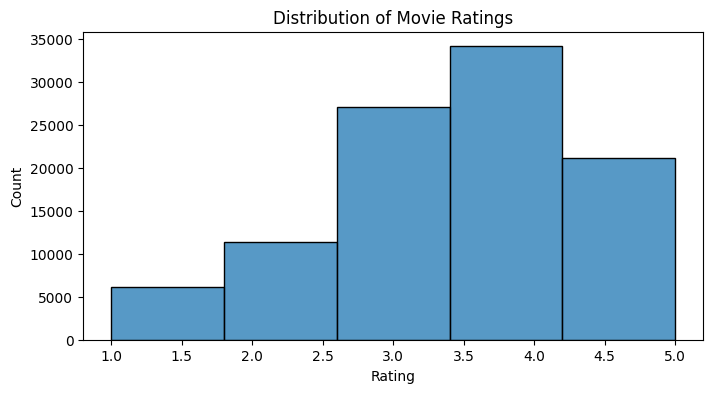

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter/Colab
%matplotlib inline

# Rating Distribution

plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=5, kde=False) # bins = 5 for the 5 possible ratings (1–5).
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<ipython-input-37-750ef150d51f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count.values, y=ratings_count.index, palette='viridis')


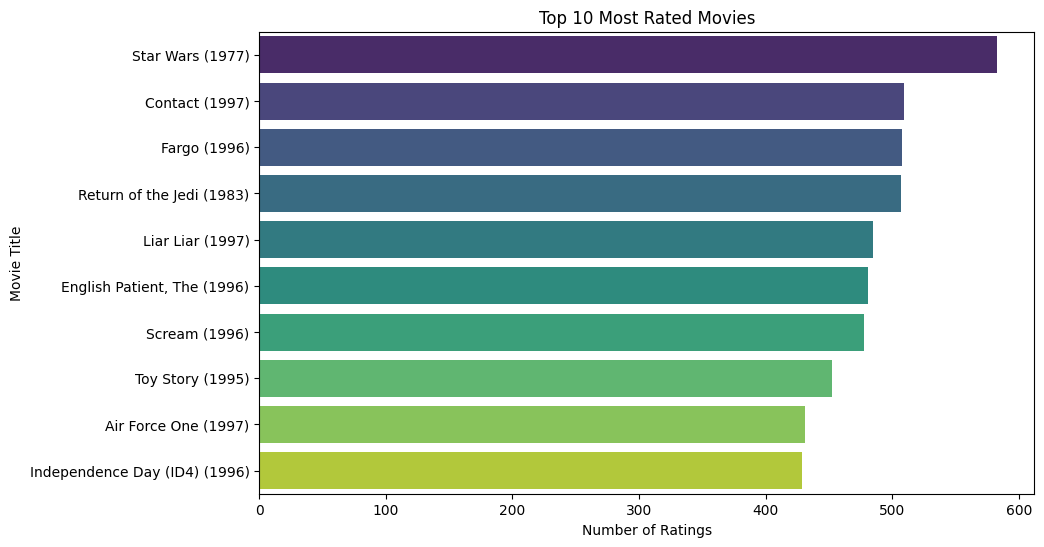

In [37]:
ratings_count = df['title'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=ratings_count.values, y=ratings_count.index, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


In [45]:
# Group by title and calculate average rating and rating count
movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
# Flatten the MultiIndex columns
movie_stats.columns = ['average_rating', 'rating_count']

min_ratings = 100

<ipython-input-46-1e3ab6551f15>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_movies['average_rating'].values, y=top_movies.index, palette=colors)


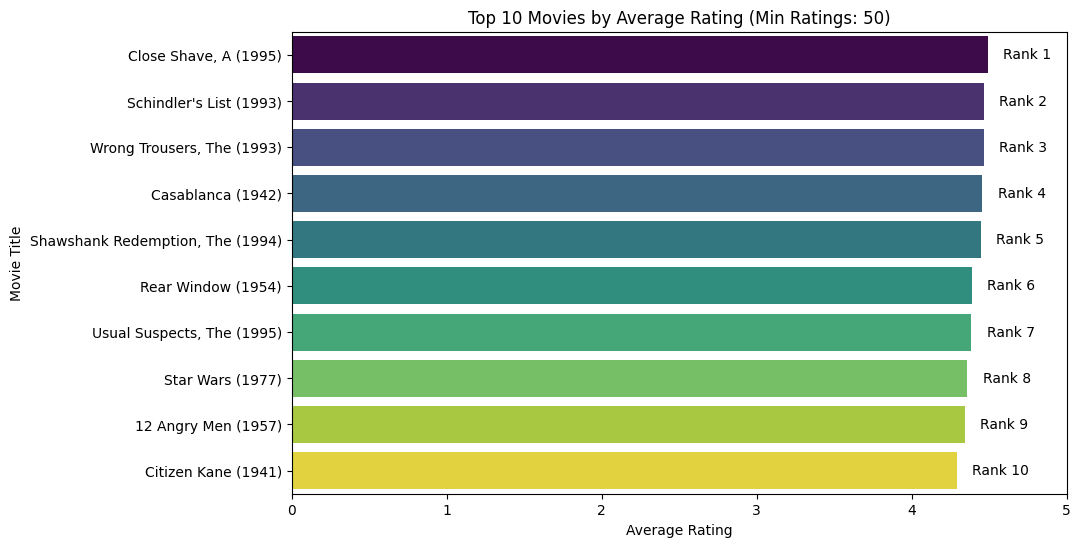

In [46]:
import matplotlib.cm as cm

# Generate a list of colors from the viridis colormap for the number of movies
n_movies = len(top_movies)
colors = cm.viridis(np.linspace(0, 1, n_movies))
# Convert the RGBA values to hex strings for use in Seaborn
colors = [cm.colors.rgb2hex(c) for c in colors]

plt.figure(figsize=(10, 6))
# Create a bar plot with our custom sequential color palette
ax = sns.barplot(x=top_movies['average_rating'].values, y=top_movies.index, palette=colors)

plt.title("Top 10 Movies by Average Rating (Min Ratings: 50)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.xlim(0, 5)  # Ratings range from 1 to 5

# Annotate each bar with its rank (natural order)
for i, rating in enumerate(top_movies['average_rating'].values):
    # The highest-rated movie (first in the sorted order) gets Rank 1, etc.
    ax.text(rating + 0.1, i, f"Rank {i+1}", color='black', va="center", fontsize=10)

plt.show()

### Timestamp Analysis

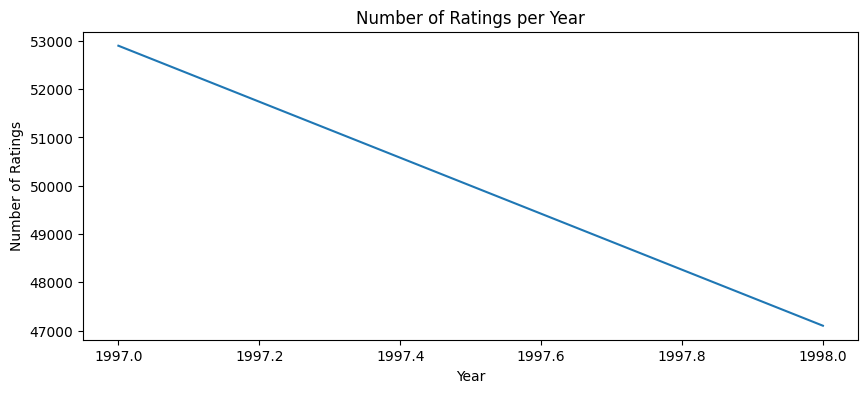

In [48]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
ratings_per_year = df.groupby('year')['rating'].count()
plt.figure(figsize=(10, 4))
sns.lineplot(x=ratings_per_year.index, y=ratings_per_year.values)
plt.title('Number of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


# User-Based Collaborative Filtering with k-Nearest Neighbors


In [63]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import numpy as np


# Split the DataFrame into 80% training and 20% test data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Check the sizes:
print("Training ratings:", len(df_train))
print("Test ratings:", len(df_test))

# Build the user–movie matrix for training data only
train_user_movie_matrix = df_train.pivot_table(index="userId", columns="title", values="rating").fillna(0)

# Convert the matrix to a NumPy array
train_matrix_np = train_user_movie_matrix.to_numpy()

# Initialize the k-NN model
knn = NearestNeighbors(
    metric='cosine',  # measures similarity by cosine distance
    algorithm='brute' # straightforward search
)

# Train the k-NN model on the training data
knn.fit(train_matrix_np)

# Verify the shape (number of users, movies)
print("Training matrix shape:", train_matrix_np.shape)




Training ratings: 80000
Test ratings: 20000
Training matrix shape: (943, 1635)


### Make a Recommendation Function


* Find neighbors using knn.kneighbors().
* Gather each neighbor’s top-rated movies.
* Exclude movies the current user has already seen.
* Return a few unseen recommendations

In [64]:
def recommend_movies(user_id, knn_model, user_movie_matrix, num_neighbors=5, num_recommendations=5):
    """
    For a given user_id, find similar users in the training data and recommend movies
    that these similar users rated highly, excluding movies the user has already rated.
    """
    try:
        # Locate the user index in the training matrix
        user_index = user_movie_matrix.index.get_loc(user_id)
    except KeyError:
        # If the user isn't in the training set, return an empty list
        return []

    # Convert the training matrix to a NumPy array
    matrix_np = user_movie_matrix.to_numpy()

    # Find the nearest neighbors (n_neighbors+1 because the first neighbor is the user itself)
    distances, indices = knn_model.kneighbors([matrix_np[user_index]], n_neighbors=num_neighbors+1)
    neighbor_indices = indices[0][1:]  # Exclude the user itself

    # Convert matrix back to DataFrame for easier handling
    user_movie_df = pd.DataFrame(matrix_np, index=user_movie_matrix.index, columns=user_movie_matrix.columns)

    recommended_movies = []
    for neighbor_idx in neighbor_indices:
        # Get neighbor's ratings and sort them descending
        neighbor_ratings = user_movie_df.iloc[neighbor_idx]
        top_rated = neighbor_ratings.sort_values(ascending=False)
        recommended_movies.extend(top_rated.index[:num_recommendations])

    # Remove duplicates and movies the user already rated in the training set
    recommended_movies = list(set(recommended_movies))
    seen_movies = set(user_movie_df.loc[user_id][user_movie_df.loc[user_id] > 0].index)
    unseen_recs = [movie for movie in recommended_movies if movie not in seen_movies]

    return unseen_recs[:num_recommendations]



### Evaluate the Model using Precision@k

For evaluation, we'll compare the recommendations against the movies each user rated in the test set. Here, Precision@k is defined as:

Precision@k = Number of recommended movies that appear in the test set/Total # of recommended movies (k)


In [65]:
k = 5  # Number of recommendations per user
precision_scores = []

# Identify users that are common to both training and test sets
common_users = set(df_test['userId']).intersection(train_user_movie_matrix.index)

for user in common_users:
    # Ground truth: movies that the user rated in the test set
    ground_truth = set(df_test[df_test['userId'] == user]['title'])

    # Get recommendations for the user from the training-based model
    recs = recommend_movies(user, knn, train_user_movie_matrix, num_neighbors=5, num_recommendations=k)

    if recs:
        # Calculate Precision@k: fraction of recommended movies that are in the ground truth
        precision = len(set(recs) & ground_truth) / len(recs)
        precision_scores.append(precision)

# Compute average precision across users
if precision_scores:
    avg_precision = sum(precision_scores) / len(precision_scores)
    print("Average Precision@{}: {:.2f}".format(k, avg_precision))
else:
    print("No common users for evaluation.")


Average Precision@5: 0.15


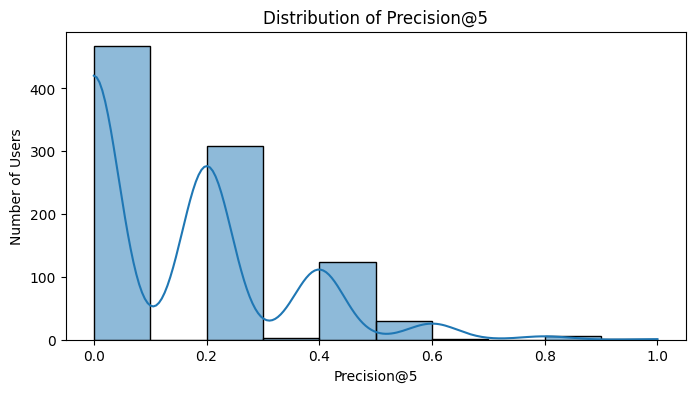

In [61]:
# Visualize Precision Distribution:

plt.figure(figsize=(8, 4))
sns.histplot(precision_scores, bins=10, kde=True)
plt.title("Distribution of Precision@{}".format(k))
plt.xlabel("Precision@{}".format(k))
plt.ylabel("Number of Users")
plt.show()


In [62]:
# Get 5 recommendations for user with userId = 10
user_id = 10
recommendations = recommend_movies(user_id, knn, train_user_movie_matrix, num_neighbors=5, num_recommendations=5)
print("Recommendations for user", user_id, ":", recommendations)

Recommendations for user 10 : ['Dumbo (1941)', 'Koyaanisqatsi (1983)', 'M*A*S*H (1970)', 'Wings of Desire (1987)', 'Treasure of the Sierra Madre, The (1948)']


In [35]:
# select all rows where userid = 10 since I want to see what movies they have rated

# Assuming 'df' is your merged DataFrame (ratings and movies)
user_10_df = df[df["userId"] == 10]
print(len(user_10_df))
user_10_df.head()

184


,userId,movieId,rating,timestamp,title,readable_time
40,10,16,4,1997-10-26 18:01:17,French Twist (Gazon maudit) (1995),1997-10-26 18:01:17
158,10,486,4,1997-10-26 17:27:26,Sabrina (1954),1997-10-26 17:27:26
386,10,175,3,1997-10-26 17:57:57,Brazil (1985),1997-10-26 17:57:57
544,10,611,5,1997-10-26 17:25:22,Laura (1944),1997-10-26 17:25:22
606,10,7,4,1997-10-26 18:56:50,Twelve Monkeys (1995),1997-10-26 18:56:50


# Build Out Interactive UI

In [66]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def get_recommendations(b):
    try:
        user_id = int(user_id_widget.value)
    except ValueError:
        with output:
            clear_output()
            print("Please enter a valid numeric User ID.")
        return

    # Get recommendations for the given user_id (using your pre-trained knn and train_user_movie_matrix)
    recs = recommend_movies(user_id, knn, train_user_movie_matrix, num_neighbors=5, num_recommendations=5)

    with output:
        clear_output()
        if recs:
            print("Recommendations for user", user_id, ":", recs)
        else:
            print("No recommendations available for user", user_id)


In [67]:
# Widget for entering user ID
user_id_widget = widgets.Text(
    value="10",
    description="User ID:",
    placeholder="Enter a user ID"
)

# Button to get recommendations
button = widgets.Button(
    description="Get Recommendations",
    button_style="success"  # Optional: gives the button a green color
)

# Output area to display recommendations
output = widgets.Output()

# Link the button click event to the recommendation function
button.on_click(get_recommendations)


In [68]:
display(user_id_widget, button, output)

Text(value='10', description='User ID:', placeholder='Enter a user ID')

Button(button_style='success', description='Get Recommendations', style=ButtonStyle())

Output()